In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('C:/Users/satyam/Downloads/Refrigerators.xlsx')
df.head(7)

,Price,Opcost,CoolSize,FreezeSize,Shelves,Features
0,595,75,7.1,5.7,3,2
1,685,75,7.2,5.7,3,1
2,535,67,8.8,4.5,1,6
3,600,67,8.7,4.5,3,5
4,605,67,8.8,4.5,3,3
5,665,67,8.8,4.5,1,10
6,515,67,9.8,4.1,2,1


In [3]:
df.shape

(37, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
Price         37 non-null int64
Opcost        37 non-null int64
CoolSize      37 non-null float64
FreezeSize    37 non-null float64
Shelves       37 non-null int64
Features      37 non-null int64
dtypes: float64(2), int64(4)
memory usage: 1.9 KB


In [5]:
df.isnull().sum()

Price         0
Opcost        0
CoolSize      0
FreezeSize    0
Shelves       0
Features      0
dtype: int64

- The dataset has all the numeric columns and it has no null values.

In [6]:
# Checking the statistical summary
df.describe()

,Price,Opcost,CoolSize,FreezeSize,Shelves,Features
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,626.351351,70.513514,8.216216,5.183784,2.513514,3.459459
std,139.789766,9.139723,1.226901,0.938235,1.121052,2.512133
min,460.000000,60.000000,5.300000,4.100000,1.000000,1.000000
25%,545.000000,66.000000,7.200000,4.400000,2.000000,2.000000
50%,590.000000,68.000000,8.000000,5.100000,2.000000,3.000000
75%,685.000000,75.000000,9.300000,5.700000,3.000000,5.000000
max,1200.000000,94.000000,10.000000,7.400000,5.000000,12.000000


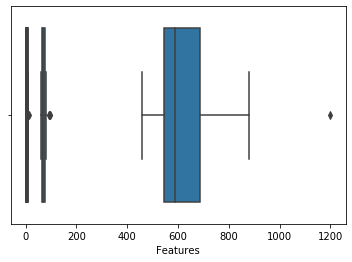

In [7]:
# Checking for the outliers
for i in df.select_dtypes(include='number'):
    sns.boxplot(df[i])

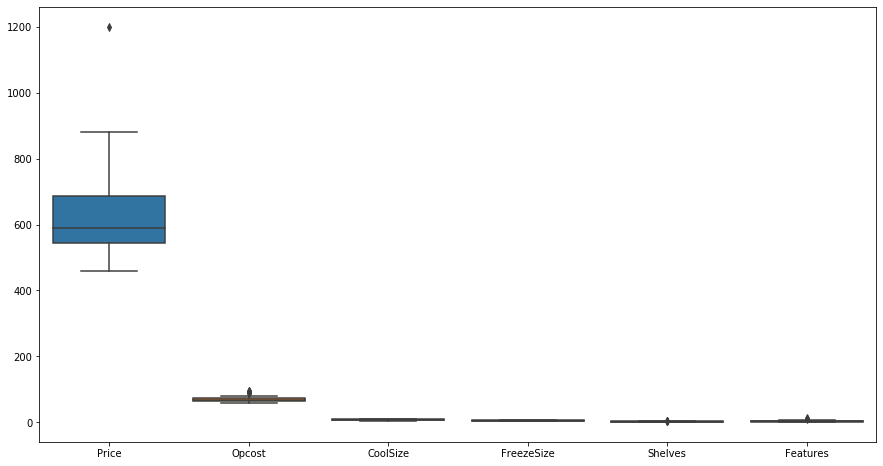

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df)
plt.show()

In [9]:
df.Price.describe()

count      37.000000
mean      626.351351
std       139.789766
min       460.000000
25%       545.000000
50%       590.000000
75%       685.000000
max      1200.000000
Name: Price, dtype: float64

In [10]:
q1 = 545
q3 = 685
iqr = q3 - q1
lowl = q1 - 1.5*iqr
uppl = q3 + 1.5*iqr
print(lowl)
print(uppl)

335.0
895.0


In [11]:
# df['Price'] = df['Price'].apply(lambda x: df.Price.quantile(0.90)  if x >= uppl else x)
# df['Price'].describe()

In [12]:
df.Price.describe()

count      37.000000
mean      626.351351
std       139.789766
min       460.000000
25%       545.000000
50%       590.000000
75%       685.000000
max      1200.000000
Name: Price, dtype: float64

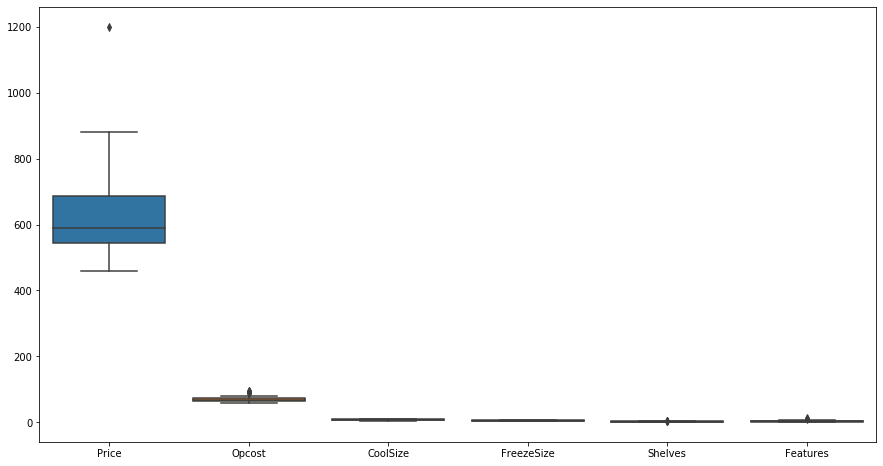

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df)
plt.show()

### Building the model

In [14]:
X = df.iloc[:,1:]
y = df.Price

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=85)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 5)
(13, 5)
(24,)
(13,)


In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')


R^2 score for train: 0.8408097668140242
R^2 score for test: 0.8072640336031744


In [18]:
# OLS Model

import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

C:\Users\satyam\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     32.05
Date:                Sun, 24 May 2020   Prob (F-statistic):           2.27e-11
Time:                        11:45:44   Log-Likelihood:                -201.12
No. Observations:                  37   AIC:                             414.2
Df Residuals:                      31   BIC:                             423.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -797.8082    271.409     -2.940      0.006   -1351.351    -244.265
Opcost        -6.9578      2.275     -3.058      0.005     -11.598      -2.317
CoolSize      76.4971     19.442      3.935      0.000      36.846     116.148
FreezeSize   213.8785     35.761      5.981      0.000     140.943     286.814
Shelves       37.9373      9.886      3.837      0.001      17.774      58.100
Features      23.7636      4.512      5.267      0.000      14.562      32.965
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                1.005
Skew:                           0.289   Prob(JB):                        0.605
Kurtosis:                       2.435   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions Of Linear Regression

### 1. AutoCorrelation

C:\Users\satyam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


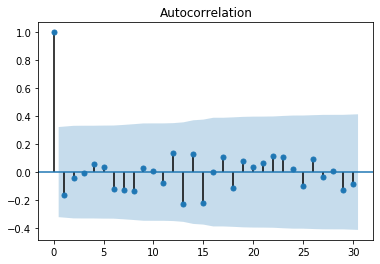

In [19]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, lags=30, alpha=0.05)
acf.show()

From the plot we can determine that there is a bit of negative autocorrelation. Also the Durbin-Watson score of 2.32 indicates that there can be low negative correlation.  

### 2. Linearity in Residuals

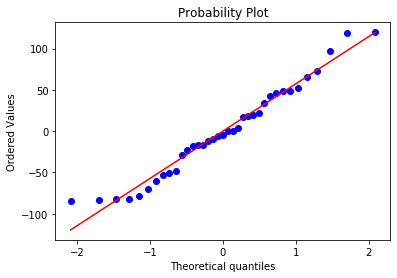

In [20]:
from scipy import stats
stats.probplot(model.resid, plot=plt)
plt.show()

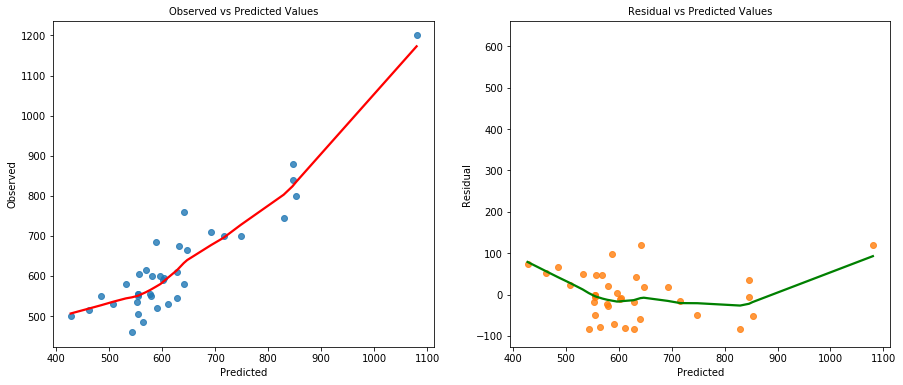

In [21]:
fitted_vals = model.predict()
resids = model.resid


fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.regplot(x = fitted_vals, y=y, lowess = True, ax=ax[0], line_kws={'color':'red'})
ax[0].set_title("Observed vs Predicted Values", fontsize=10)
ax[0].set(xlabel='Predicted', ylabel='Observed')


sns.regplot(x = fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color':'green'})
ax[1].set_title("Residual vs Predicted Values", fontsize=10)
ax[1].set(xlabel = "Predicted", ylabel="Residual")
plt.show()

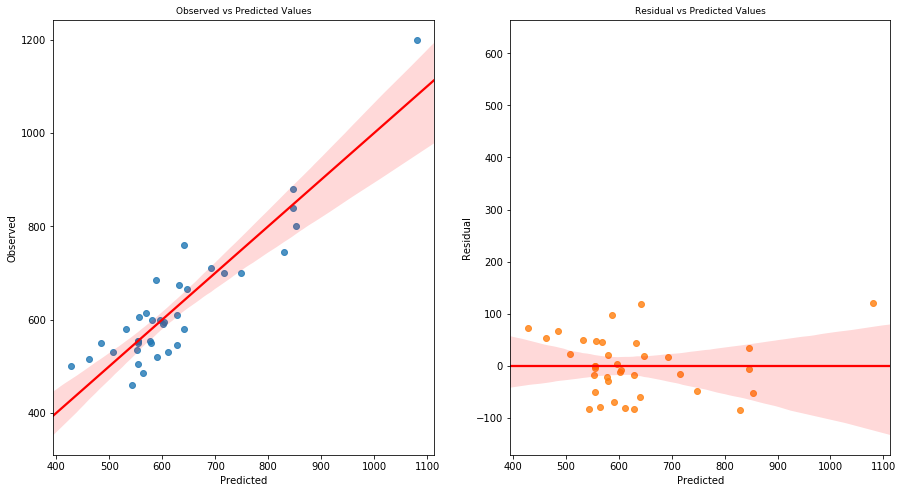

In [22]:
fitted_vals = model.predict()
resids = model.resid

fig, ax = plt.subplots(1,2,figsize=(15,8))

sns.regplot(x = fitted_vals, y=y, ax=ax[0], line_kws={'color':'red'})
ax[0].set_title("Observed vs Predicted Values", fontsize=9)
ax[0].set(xlabel = "Predicted", ylabel = "Observed")

sns.regplot(x = fitted_vals, y = resids, ax=ax[1], line_kws={'color':'red'})
ax[1].set_title("Residual vs Predicted Values", fontsize=9)
ax[1].set(xlabel='Predicted', ylabel='Residual')
plt.show()

In [23]:
from statsmodels.compat import lzip
import statsmodels.api as sm

name = ['F-statistics', 'p-value']
test = sm.stats.diagnostic.linear_rainbow(res=model, frac=0.5)
print(lzip(name, test))

[('F-statistics', 1.229003687336261), ('p-value', 0.36464475875614083)]


Since p-value is greator than 0.05 which implies that there is linearity in the residuals.

### 3. Normality in residuals

In [24]:
from scipy import stats
print(stats.jarque_bera(model.resid))  

(1.0052110705899016, 0.6049523796963137)


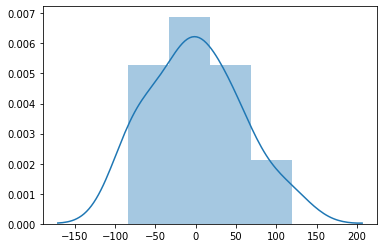

In [25]:
sns.distplot(model.resid)
plt.show()

In [26]:
stats.jarque_bera(model.resid)

(1.0052110705899016, 0.6049523796963137)

In [27]:
from statsmodels.compat import lzip

name=['F-statistics', 'p-value']
test = stats.shapiro(model.resid)
print(lzip(name, test))

[('F-statistics', 0.9613720774650574), ('p-value', 0.22325065732002258)]


Since p-value is greator than 0.05, we'll accept the H0 and conclude that there is normality in the residuals.

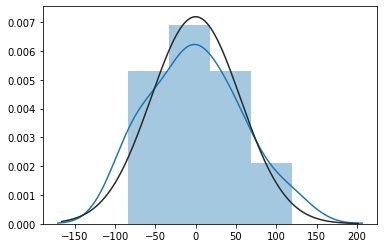

In [28]:
from scipy.stats import norm
norm.fit(model.resid)
sns.distplot(model.resid, fit=norm)
plt.show()

### 4. Homoscedasticity

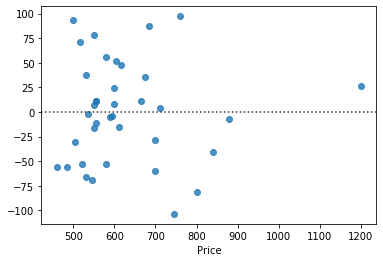

In [29]:
sns.residplot(y, model.resid)
plt.show()

In [30]:
import statsmodels.stats.api as sms

name=['F-statistics', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
print(lzip(name, test))

[('F-statistics', 1.9918809170245613), ('p-value', 0.11609967581061173)]


Since p-value is greator than 0.05 which implies that the residuals are Homoscedastic.

### 5. Multicollinearity

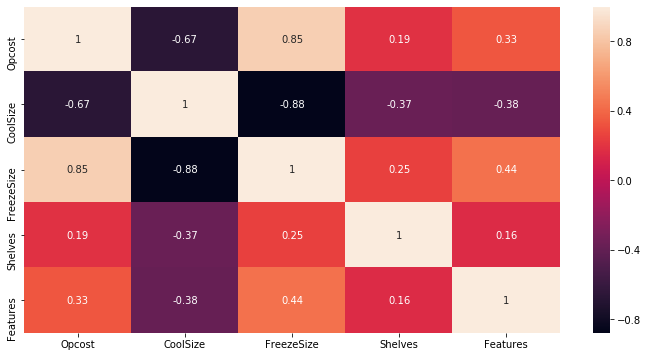

In [31]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(X.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index = X.columns).T

,Opcost,CoolSize,FreezeSize,Shelves,Features
vif,4.232301,5.568151,11.017494,1.202091,1.257165


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Feature']=X.columns
vif.sort_values('VIF',ascending=False)

,VIF,Feature
0,259.407845,Opcost
2,179.916043,FreezeSize
1,24.261754,CoolSize
3,6.478725,Shelves
4,3.680741,Features


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
  
pd.DataFrame([vif(Xc.values, i) for i in range(Xc.shape[1])], index=Xc.columns, columns=['vif'])

,vif
const,740.935246
Opcost,4.232301
CoolSize,5.568151
FreezeSize,11.017494
Shelves,1.202091
Features,1.257165


In [35]:
# Remove correlated feature Freezesize
Xc1 = X.drop('FreezeSize', 1)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(Xc1.values,i) for i in range(Xc1.shape[1])]
vif['Feature']=Xc1.columns
vif.sort_values('VIF',ascending=False)

,VIF,Feature
0,28.165288,Opcost
1,17.408240,CoolSize
2,6.378554,Shelves
3,3.457079,Features


In [37]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = [variance_inflation_factor(Xc1.values, i) for i in range(Xc1.shape[1])]
# pd.DataFrame({'vif': vif[1:]}, index = Xc1.columns).T

By excluding the highest vif value feature collinearity increases, we'll continue using the earlier features

In [38]:
from sklearn.linear_model import Ridge, RidgeCV

In [39]:
alphas = np.logspace(0, 1, 200)

ridge_cv = RidgeCV(alphas=alphas, scoring = 'r2', cv=3)
ridge_cv.fit(X, y)

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([ 1.        ,  1.01163798,  1.0234114 ,  1.03532184,  1.0473709 ,
        1.05956018,  1.07189132,  1.08436597,  1.0969858 ,  1.1097525 ,
        1.12266777,  1.13573336,  1.148951  ,  1.16232247,  1.17584955,
        1.18953407,  1.20337784,  1.21738273,  1.2315506 ,  1.24588336,
        1.26038293,  1.27505124,  1.28989026,  1.30490198,  1.3200884 ,
        1.33545156,  1.35099352,  1.36671636,  1.38262217,  1.3987131 ,
        1.4149913 ,  1.431...
        7.57525026,  7.66341087,  7.75259749,  7.84282206,  7.93409667,
        8.02643352,  8.11984499,  8.21434358,  8.30994195,  8.40665289,
        8.50448934,  8.60346442,  8.70359136,  8.80488358,  8.90735464,
        9.01101825,  9.1158883 ,  9.22197882,  9.32930403,  9.43787828,
        9.54771611,  9.65883224,  9.77124154,  9.88495905, 10.        ]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [40]:
alphas = np.logspace(0.00001, 1, 100)

ridge_cv = RidgeCV(alphas=alphas, scoring ='r2', cv=3)
ridge_cv.fit(X,y)

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([ 1.00002303,  1.02355435,  1.04763939,  1.07229116,  1.09752302,
        1.12334859,  1.14978187,  1.17683713,  1.20452903,  1.23287255,
        1.261883  ,  1.2915761 ,  1.3219679 ,  1.35307484,  1.38491375,
        1.41750186,  1.45085679,  1.48499658,  1.51993972,  1.55570509,
        1.59231205,  1.6297804 ,  1.66813041,  1.70738283,  1.74755888,
        1.78868031,  1.83076936,  1.8738488 ,  1.91794193,  1.96307261,
        2.00...
        5.7223996 ,  5.85705215,  5.99487318,  6.13593724,  6.28032066,
        6.42810152,  6.57935979,  6.73417728,  6.89263775,  7.05482692,
        7.22083253,  7.39074438,  7.56465439,  7.74265664,  7.92484742,
        8.11132529,  8.30219113,  8.49754819,  8.69750216,  8.90216121,
        9.11163604,  9.32603998,  9.54548901,  9.77010185, 10.        ]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [41]:
ridge_cv.alpha_

1.0000230261160268

In [42]:
ridge_cv.coef_

array([ -4.21079311,  48.249341  , 153.12542124,  33.77205857,
        25.29669664])

In [43]:
from sklearn.metrics import r2_score,mean_squared_error

In [44]:
ridge=Ridge(alpha=ridge_cv.alpha_,random_state=3)
ridge.fit(X_train,y_train)
y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)
print('r-squared of test:',r2_score(y_test,y_test_pred))
print('r-squared of train:',r2_score(y_train,y_train_pred))

r-squared of test: 0.7177177326933916
r-squared of train: 0.8222070259738115


Since Ridge Regularization deosn't help in improving the r2 score, the initial model is more significant.

In [45]:
from sklearn.linear_model import Lasso, LassoCV

In [46]:
alphas = np.linspace(0.00001, 1, 100)
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=3)
lasso_cv.fit(X, y)

LassoCV(alphas=array([1.00000000e-05, 1.01109091e-02, 2.02118182e-02, 3.03127273e-02,
       4.04136364e-02, 5.05145455e-02, 6.06154545e-02, 7.07163636e-02,
       8.08172727e-02, 9.09181818e-02, 1.01019091e-01, 1.11120000e-01,
       1.21220909e-01, 1.31321818e-01, 1.41422727e-01, 1.51523636e-01,
       1.61624545e-01, 1.71725455e-01, 1.81826364e-01, 1.91927273e-01,
       2.02028182e-01, 2.12129091e-0...
       8.88890000e-01, 8.98990909e-01, 9.09091818e-01, 9.19192727e-01,
       9.29293636e-01, 9.39394545e-01, 9.49495455e-01, 9.59596364e-01,
       9.69697273e-01, 9.79798182e-01, 9.89899091e-01, 1.00000000e+00]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=3, selection='cyclic', tol=0.0001,
        verbose=False)

In [47]:
lasso_cv.alpha_

1e-05

Best Alpha is hitting the lowest. This indicates that this model doesn't require Lasso regularization.